In [1]:
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import konlpy

In [ ]:
#참고링크 : https://serendipity77.tistory.com/m/entry/%EC%98%81%ED%99%94%EB%8F%99%EA%B0%90-%EC%98%81%ED%99%94%EB%8F%99%EA%B0%90-%EB%8C%93%EA%B8%80-%EB%A6%AC%EB%B7%B0-%EC%9B%8C%EB%93%9C-%ED%81%B4%EB%9D%BC%EC%9A%B0%EB%93%9Cwordcloud%EB%A1%9C-%EB%A7%8C%EB%93%A4%EC%96%B4%EB%B3%B4%EA%B8%B0%ED%8C%8C%EC%9D%B4%EC%8D%AC-Python

In [65]:
plt.rc('font', family='NanumGothic')        # For Windows 

print(plt.rcParams['font.family'])


['NanumGothic']


In [63]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False  # minus 표시
plt.rc('font', family='Malgun Gothic')

In [2]:
df = pd.read_excel('./Moviestar/파일 전처리 완/역대_네이버_영화_리뷰_최종_수정.xlsx')

In [3]:
df

,순위,영화명,개봉일,제목,개봉,구분,별점,리뷰
0,1,명량,2014-07-30,명량,2014-07-30,관람객,10.0,오늘 아침에 조조로 보고왔습니다. 8월4일에 해군에 입대하는데. 그전에 보기 잘한 ...
1,1,명량,2014-07-30,명량,2014-07-30,관람객,9.0,"극찬할 수는 없지만 이 정도면 내용, 영상, 연출 전부 꽤나 뛰어난 작품이지 않은가..."
2,1,명량,2014-07-30,명량,2014-07-30,관람객,10.0,보는 내내 가슴찡하고 울컥하는 진짜 최고의 영화ㅠㅠ한 순간도 놓칠 수 없는 해전씬이...
3,1,명량,2014-07-30,명량,2014-07-30,관람객,10.0,작금의 이시점에 국가가 혼란하고 위태할수록국가를 직간접으로 책임지고 있는 리더에게 ...
4,1,명량,2014-07-30,명량,2014-07-30,관람객,8.0,전쟁씬에서 입벌리고봄
...,...,...,...,...,...,...,...,...
7590,200,부러진 화살,2012-01-18,부러진 화살,2012-01-18,평론가,7.0,"의미와 재미, 한국영화 어른들의 힘!"
7591,200,부러진 화살,2012-01-18,부러진 화살,2012-01-18,평론가,8.0,사법부의 심장을 향해 겨누어진 실화 한방!
7592,200,부러진 화살,2012-01-18,부러진 화살,2012-01-18,평론가,7.0,국민배우 안성기 구하기
7593,200,부러진 화살,2012-01-18,부러진 화살,2012-01-18,평론가,8.0,"아름다워라, 이것이 선배의 영화"


In [4]:
df['리뷰'] = df['리뷰'].str.replace('[^가-힣]', ' ', regex = True) # 한글을 제외한 나머지는 공백으로 대체

In [5]:
df['리뷰']

0       오늘 아침에 조조로 보고왔습니다   월 일에 해군에 입대하는데  그전에 보기 잘한 ...
1       극찬할 수는 없지만 이 정도면 내용  영상  연출 전부 꽤나 뛰어난 작품이지 않은가...
2       보는 내내 가슴찡하고 울컥하는 진짜 최고의 영화  한 순간도 놓칠 수 없는 해전씬이...
3       작금의 이시점에 국가가 혼란하고 위태할수록국가를 직간접으로 책임지고 있는 리더에게 ...
4                                             전쟁씬에서 입벌리고봄
                              ...                        
7590                                 의미와 재미  한국영화 어른들의 힘 
7591                              사법부의 심장을 향해 겨누어진 실화 한방 
7592                                         국민배우 안성기 구하기
7593                                    아름다워라  이것이 선배의 영화
7594                                    한국의 법정이라는 부조리 코미디
Name: 리뷰, Length: 7595, dtype: object

In [15]:
kkma = konlpy.tag.Kkma()

In [6]:
len(df)

7595

In [7]:
df['리뷰'][0]
#df.loc[0,'리뷰']

'오늘 아침에 조조로 보고왔습니다   월 일에 해군에 입대하는데  그전에 보기 잘한 영화같습니다  평소에 영화 많이 좋아하고 자주보는 편인데  무지 재미있게 봤습니다  나라 잘지키고 오겠습니다 필승'

In [81]:
type(df['리뷰'][0].split(' ')[0])
df['리뷰'][0].split(' ')[:3]

['오늘', '아침에', '조조로']

In [9]:
type(df['리뷰'][0].split(' ')[0]) == str

True

In [58]:
list_not_str = []
for i in range(len(df)):
    list1 = df['리뷰'][i].split(' ')
    for j in list1:
        if type(j) != str:
            list_not_str.append(i)
list_not_str

AttributeError: 'float' object has no attribute 'split'

In [10]:
# not string 찾기
list_not_str = []
for i in range(len(df)):
    try : 
        list1 = df['리뷰'][i].split(' ')
    except Exception as e :
        print(e)
        print("i 는 : ", i)
    for j in list1:
        if type(j) != str:
            list_not_str.append(i)
list_not_str

'float' object has no attribute 'split'
i 는 :  289
'float' object has no attribute 'split'
i 는 :  291
'float' object has no attribute 'split'
i 는 :  2788
'float' object has no attribute 'split'
i 는 :  6209
'float' object has no attribute 'split'
i 는 :  6250
'float' object has no attribute 'split'
i 는 :  7024
'float' object has no attribute 'split'
i 는 :  7424
'float' object has no attribute 'split'
i 는 :  7441


[]

In [11]:
df.dropna(inplace= True)

In [16]:
# KKH 230515
try : 
    nouns = df['리뷰'].apply(kkma.nouns)
except Exception as e :
    print(e)
    
    

In [17]:
nouns

0       [오늘, 아침, 조조, 월, 일, 해군, 입대, 그전, 보기, 영화, 평소, 편, 필승]
1       [극찬, 수, 정도, 내용, 영상, 연출, 전부, 작품, 평론가, 평점, 점, 점수...
2                 [가슴, 진짜, 최고, 영화, 순간, 수, 해전, 해전씬, 씬, 압권]
3       [작금, 시점, 국가, 혼란, 수록, 수록국가, 직간접, 리더, 무엇, 필요, 지,...
4                                      [전쟁, 전쟁씬, 씬, 입, 봄]
                              ...                        
7590                        [의미, 재미, 한국, 한국영화, 영화, 어른, 힘]
7591                                    [사법부, 심장, 실화, 한방]
7592                           [국민, 국민배우, 배우, 안, 안성기, 성기]
7593                                      [라, 이것, 선배, 영화]
7594                                   [한국, 법정, 부조리, 코미디]
Name: 리뷰, Length: 7587, dtype: object

In [44]:
nouns = nouns.explode()
nouns

0        오늘
0        아침
0        조조
0         월
0         일
       ... 
7593     영화
7594     한국
7594     법정
7594    부조리
7594    코미디
Name: 리뷰, Length: 78593, dtype: object

In [45]:
df_keyword = pd.DataFrame({'keyword':nouns})
df_keyword['count'] = df_keyword['keyword'].str.len()
df_keyword = df_keyword.query('count >= 2')
df_keyword

,keyword,count
0,오늘,2.0
0,아침,2.0
0,조조,2.0
0,해군,2.0
0,입대,2.0
...,...,...
7593,영화,2.0
7594,한국,2.0
7594,법정,2.0
7594,부조리,3.0


In [84]:
df_keyword.sort_values(by='count', ascending=False)

,keyword,count
7532,영화,2469
7370,연기,654
4226,배우,492
6926,액션,402
10912,최고,368
...,...,...
12503,헌법,1
12505,헌사이자,1
289,강원도,1
288,강원,1


In [47]:
df_keyword = df_keyword.groupby('keyword', as_index = False).count().sort_values('count', ascending = False)
df_keyword

,keyword,count
7532,영화,2469
7370,연기,654
4226,배우,492
6926,액션,402
10912,최고,368
...,...,...
7591,영화의,1
7590,영화음악,1
7589,영화우리나라,1
7588,영화오랜만,1


In [48]:
df_keyword.set_index('keyword') # keyword로 인덱스를 잡는다/

,count
keyword,
영화,2469
연기,654
배우,492
액션,402
최고,368
...,...
영화의,1
영화음악,1
영화우리나라,1


In [49]:
dic_keyword = df_keyword.set_index('keyword').to_dict()['count']
dic_keyword

{'영화': 2469,
 '연기': 654,
 '배우': 492,
 '액션': 402,
 '최고': 368,
 '생각': 363,
 '스토리': 352,
 '기대': 304,
 '사람': 281,
 '장면': 272,
 '감독': 262,
 '캐릭터': 255,
 '감동': 251,
 '한국': 238,
 '재미': 232,
 '이야기': 230,
 '시리즈': 225,
 '시간': 215,
 '마지막': 211,
 '정도': 201,
 '평점': 181,
 '우리': 176,
 '관객': 168,
 '마블': 165,
 '눈물': 164,
 '느낌': 164,
 '연출': 163,
 '하나': 159,
 '작품': 153,
 '이상': 141,
 '사랑': 134,
 '이것': 133,
 '가족': 130,
 '진짜': 130,
 '만큼': 124,
 '처음': 120,
 '내용': 119,
 '하다': 117,
 '부분': 116,
 '무엇': 114,
 '몰입': 111,
 '역사': 109,
 '기억': 107,
 '때문': 105,
 '인물': 105,
 '매력': 104,
 '주인공': 103,
 '감정': 102,
 '시대': 101,
 '마음': 101,
 '자체': 100,
 '대박': 99,
 '지금': 99,
 '스파이': 99,
 '동원': 99,
 '현실': 98,
 '웃음': 98,
 '유머': 97,
 '완벽': 97,
 '대사': 91,
 '이해': 90,
 '하정': 88,
 '전개': 88,
 '개봉': 88,
 '소재': 87,
 '극장': 87,
 '코미디': 87,
 '인간': 87,
 '연기력': 87,
 '장르': 86,
 '필요': 85,
 '상황': 85,
 '이유': 85,
 '가슴': 83,
 '음악': 83,
 '모습': 83,
 '완전': 82,
 '영화관': 81,
 '드라마': 81,
 '재난': 81,
 '어로': 80,
 '한국영화': 80,
 '강동원': 80,
 '감동적': 79,
 '시작': 79

In [71]:
plt.rc('font', family='Malgun Gothic')

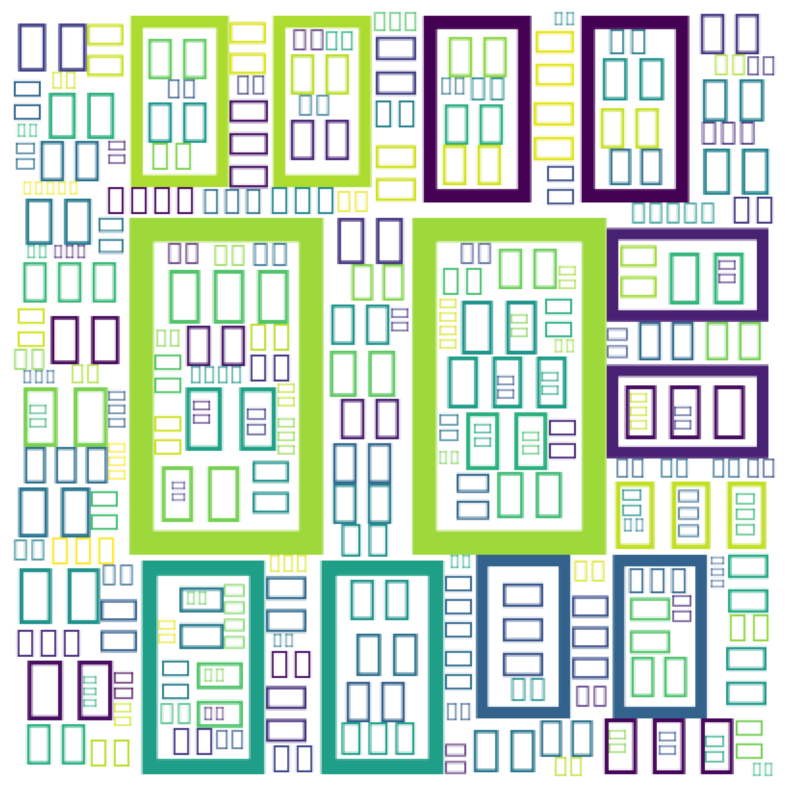

In [72]:
wc = WordCloud(random_state = 123, font_path = 'NanumGothic', width = 400,
               height = 400, background_color = 'white')
#wc = WordCloud()
img_wordcloud = wc.generate_from_frequencies(dic_keyword)

plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기
# plt.savefig('워드클라우드') # 파일 저장

In [78]:
font_path = r'C:\Users\user\Downloads\nanum-gothic\NanumGothic.ttf'

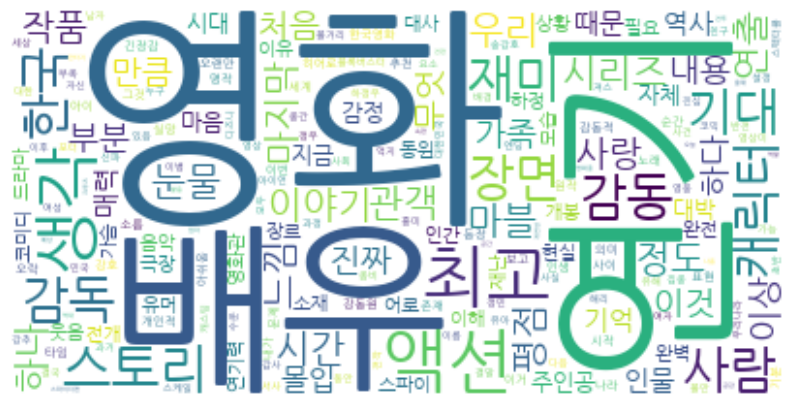

In [79]:
wc = WordCloud(background_color = 'white', font_path = font_path,
               relative_scaling = 0.2, min_font_size = 1,
               max_font_size = 120).generate_from_frequencies(dic_keyword)
# font_path = font_path
plt.figure(figsize = (10, 6))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()